<a href="https://colab.research.google.com/github/mjcho/Screenomics-Assay/blob/master/Screenomics_Assay_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Screenomics Assay Demo
This notebook demos how to load and use the various tools of the Screenomics Assay data processing system. The procedure for using these tools on virtual or local machines should be very similar.

## Colab notes
*   Don't forget to enable GPU (Runtime -> Change runtime type) to accelerate.
*   If GPU is not available, the main program automatically switch to CPU. You can also specify `-dv cpu` in the run command to force using cpu instead, e.g.,
```python Screenomics-Assay/scr_assay.py run OCR -dv cpu w5_9999 w5_9999_out```

## TODO

# 1. Setup
Setting up the environment and tools.

## 1.1 Mount Google Drive (Optional)
For saving data and results. Select your Google account and click "allow" at the prompt, then your Google Drive will be mounted to the directory `/content/gdrive`. This allows you to save results, which will otherwise be deleted hours after this session is closed.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


## 1.2 Fetch the main repo

In [ ]:
!git clone https://github.com/mjcho/Screenomics-Assay.git

Cloning into 'Screenomics-Assay'...
remote: Enumerating objects: 258, done.
remote: Counting objects: 100% (167/167), done.
remote: Compressing objects: 100% (120/120), done.
remote: Total 258 (delta 109), reused 103 (delta 47), pack-reused 91
Receiving objects: 100% (258/258), 165.54 MiB | 21.69 MiB/s, done.
Resolving deltas: 100% (146/146), done.


In [ ]:
### TODELETE
%%bash
cd Screenomics-Assay/
git reset --hard
git pull

HEAD is now at d6fee78 revised Face.py to force changes in facenet_pytorch
Updating d6fee78..c6107d1
Fast-forward
 modules/Face.py              | 21 +++++++++++++++++++++
 modules/FeatureExtraction.py | 11 ++++++++++-
 2 files changed, 31 insertions(+), 1 deletion(-)


From https://github.com/mjcho/Screenomics-Assay
   d6fee78..c6107d1  master     -> origin/master


## 1.3 Set up environments and packages
Install `conda` / `mamba` using `condacolab` for the current colab session. Note that `conda` and the environments we set up here gets deleted hours after the session's ended, so you'll need to set up the env each time running this demo.

In a vm or local setup, you'll need to install the `conda` version suitable for your machine. Note that in a Colab environment, we need to `source activate` the environment in each `%%bash` code chunk.

In [ ]:
# Note that the kernel gets restarted after condacolab is installed. Simply continue to the next block.
%pip install -q condacolab
import condacolab
condacolab.install_mambaforge()


⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:13
🔁 Restarting kernel...


In [ ]:
# Setting up this on Colab takes about 10 minutes, depends greatly on Google's current traffic
%%bash
mamba create --name assay --file Screenomics-Assay/requirements/assay.txt
source activate assay
pip install -r Screenomics-Assay/requirements/assay_pip.txt --no-deps


intel-openmp-2021.4. |            |   0% 
ca-certificates-2023 |            |   0% 

cuda-version-11.3    |            |   0% 


font-ttf-dejavu-sans |            |   0% 



font-ttf-inconsolata |            |   0% 




font-ttf-source-code |            |   0% 





font-ttf-ubuntu-0.83 |            |   0% 






libgfortran5-13.1.0  |            |   0% 







libstdcxx-ng-13.1.0  |            |   0% 








python_abi-3.7       |            |   0% 









pytorch-mutex-1.0    |            |   0% 










fonts-conda-forge-1  |            |   0% 











libgfortran-ng-13.1. |            |   0% 












libgomp-11.2.0       |            |   0% 













fonts-conda-ecosyste |            |   0% 














_openmp_mutex-4.5    |            |   0% 















libgcc-ng-13.1.0     |            |   0% 
















abseil-cpp-20210324. |            |   0% 

















alsa-lib-1.2.7.2     |            |   0% 


















intel-openmp-2021.4. |        

  Running command git clone --filter=blob:none --quiet https://github.com/sajjjadayobi/FaceLib.git /tmp/pip-install-v2mcq8a1/facelib_205768d07a1945feba663ed436efbd1b


## 1.4 Download demo files
Download some example images for demo. These images in the directory `w5_9999` was created by our colleagues for demo only.

In [ ]:
!gdown --folder --remaining-ok https://drive.google.com/drive/folders/1WZhsgribNk-x8V67UpLhc3KNr9A8ts4Z

Retrieving folder list
Processing file 19P6aBLEhzPzPUb6cA6RCEcXKR8L-Ncgc w5_9999_DayinDigitalLife20210823163833734_START.jpg
Processing file 1rzII5x6VoCLLhQewk5-gsIASR8GDNMmB w5_9999_DayinDigitalLife20210823163838736.jpg
Processing file 1r7U9NjaDMO01P9O8CSWRWQLvy68lluuv w5_9999_DayinDigitalLife20210823163843737.jpg
Processing file 1USwKerK4swa9JR1gI-0NrtJjhFs457Ru w5_9999_DayinDigitalLife20210823163848737.jpg
Processing file 15PkPLM-U9IoifbXsjEz4UHHYg8PqtEQ6 w5_9999_DayinDigitalLife20210823163853739.jpg
Processing file 1juo2zCIG72OUYV7aD1mz3LuwFafjeK0z w5_9999_DayinDigitalLife20210823163858739.jpg
Processing file 1couLG2oNYdu75zd-mZAwH4-mkl8lFrSP w5_9999_DayinDigitalLife20210823163903744.jpg
Processing file 1XvKCRkhdQmNF_d_73LLJL8cvbL-BLKCC w5_9999_DayinDigitalLife20210823163908745.jpg
Processing file 1eU5oqP7XCWrOncZr_AKNPGQKH07zyjxP w5_9999_DayinDigitalLife20210823163913745.jpg
Processing file 1V7DiKpceAptkfj9WiNBIMEHgdlvsY4aI w5_9999_DayinDigitalLife20210823163918745.jpg
Processing 

In [ ]:
%%bash
# create mock classes
mkdir  w5_9999/class1
mkdir w5_9999/class2
mv w5_9999/w5_9999_DayinDigitalLife20210823163* w5_9999/class1
mv w5_9999/w5_9999_DayinDigitalLife20210823164* w5_9999/class2

# 2. Validate images
Before feeding images through the models, we need to make sure that the images are valid for `PIL` and `cv2` to open. The command for doing this is as follows:
```
python Screenomics-Assay/scr_assay.py validate [DIR_PATH] [OUT_DIR]
```
*   `DIR_PATH`: Path of the image folder.
*   `OUT_DIR`: Directory to output the results (a file that contains paths of the invalid images). Directory is automatically created if it does not exist.




In [ ]:
# validate images in w5_9999
%%bash
source activate assay
python Screenomics-Assay/scr_assay.py validate w5_9999 w5_9999_out

Listing images for w5_9999 at: 2023-06-15 20:00:03.558144.

	Listing for class1 done in : 0.0001850128173828125s.

	Listing for class2 done in : 0.0005030632019042969s.

Listing ends for w5_9999 at: 2023-06-15 20:00:03.559179.

Concatenating file lists for w5_9999 starts at: 2023-06-15 20:00:03.559255.

Concatenating file lists for w5_9999 ends at: 2023-06-15 20:00:03.559299. List len = 50.

Verification for w5_9999 starts at: 2023-06-15 20:00:03.559337.

Verification for w5_9999 ends at: 2023-06-15 20:00:03.577145.

Saving for w5_9999 starts at: 2023-06-15 20:00:03.577303.

Saving for w5_9999 ends at: 2023-06-15 20:00:03.577519.




100%|██████████| 50/50 [00:00<00:00, 153862.95it/s]


In [ ]:
# You can use the results of validation to move the invalid images to another dirctory, see the example below.
import os
import shutil
import pickle

with open('w5_9999_out/invalid_images_w5_9999.pkl', 'rb') as f:
    invalid_images = pickle.load(f)

# convert path because the ud list is validated on a different disk and a different path
# invalid_images = [p[:10] + p[13:] for p in invalid_images]

mv_dir = './w5_9999_invalid_images'
if not os.path.isdir(mv_dir): # for outputs
    os.mkdir(mv_dir)

err = []
for inv in invalid_images:
    try:
        shutil.move(inv, mv_dir)
    except Exception as e:
        err.append(e)

# We do not have any invalid images, so w5_9999_invalid_images has no files in it.

# 3. Run modules
There are two steps for running a module. First, a dataset needs to be created for the module to run on. Second, the module runs on the dataset. You only need to create the dataset for a module and a set of images once.



**Create dataset**
```
python Screenomics-Assay/scr_assay.py create [MODULE] [DIR_PATH] [OUT_DIR]
```
*   `DIR_PATH`: Path of the image folder.
*   `OUT_DIR`: Directory to output the dataset. Directory is automatically created if it does not exist.
*   `MODULE`: {DeepAffect, Face, Food, ImageClassification, ImageProperties, ObjectDetection, OCR, Places365, FeatureExtraction} Module to run or create dataset for.

**Run module**
```
python Screenomics-Assay/scr_assay.py run [-h] [-d DATASET] [-bs BATCH_SIZE] [-nw NUM_WORKERS] [-dv DEVICE] [-m {clip,dino_vitb8,moco,resnet50}] [MODULE] [DIR_PATH] [OUT_DIR]
```
*   `DIR_PATH`: Path of the image folder.
*   `OUT_DIR`: Directory to output the results. Directory is automatically created if it does not exist.
*   `MODULE`: {DeepAffect, Face, Food, ImageClassification, ImageProperties, ObjectDetection, OCR, Places365, FeatureExtraction} Module to run or create dataset for.

*   optional arguments:
  *   `-d DATASET, --dataset DATASET`
  The path of the dataset to be run on, default: `[OUT_DIR]/[name of the image folder]_dataset_[MODULE].pkl`
  *   `-bs BATCH_SIZE, --batch_size BATCH_SIZE`
  Batch size of the prediction, default: 32
  *   `-nw NUM_WORKERS, --num_workers NUM_WORKERS`
  Number of workers for the dataloader, default: num of cpu cores
  *   `-dv DEVICE, --device DEVICE`
  Device to run the model (e.g., 'cpu' or 'cuda:0'), gpu device ordinal is also valid (default is 0)
  *   `-m {clip,dino_vitb8,moco,resnet50}, --model {clip,dino_vitb8,moco,resnet50}`
  Model used for feature extraction, default: clip




## 3.1 DeepAffect
Note that we do not have the permission to share this model publicly. This is only for lab use now.

In [ ]:
# Google Drive limits the times of anonymous download for a public file,
# so running this block in multiple times may cause the `run`
# command to raise an error saying that you "Cannot retrieve the public link of the file".
%%bash
source activate assay # this is needed only in Colab
python Screenomics-Assay/scr_assay.py create DeepAffect w5_9999 w5_9999_out
python Screenomics-Assay/scr_assay.py run DeepAffect w5_9999 w5_9999_out



libjpeg-turbo is on


Initiating w5_9999 DeepAffect dataset start at: 2023-06-15 20:12:00.182267

Initiation w5_9999 DeepAffect dataset ends at: 2023-06-15 20:12:00.183308

Saving dataset...
Dataset saved, length = 50




libjpeg-turbo is on


Loading model...







Model loaded.


Loading dataset...
w5_9999_out/w5_9999_dataset_DeepAffect.pkl
Dataset loaded, length = 50


Creating dataloader...
dataloader created, length = 2.


Processing starts at: 2023-06-15 20:12:58.857590

Done all 2 batches at: 2023-06-15 20:15:12.185404.
 Elapsed time: 2m 13.33s. 



Downloading...
From: https://drive.google.com/uc?id=1WBqYarmwywFpyQgH6pzJhKLJo3bcNxtb&confirm=t
To: /content/Screenomics-Assay/Face5frz_2-2-3BestModel.h5
100%|██████████| 2.61G/2.61G [00:25<00:00, 101MB/s]2023-06-15 20:12:33.239601: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-06-15 20:12:33.239745: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-15 20:12:33.239786: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (248c0d2bfaba): /proc/driver/nvidia/version does not exist
2023-06-15 20:12:33.240349: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to

In [ ]:
## Show some results
import os
import numpy as np
import pandas as pd

module = "DeepAffect"
saved = os.listdir(f'w5_9999_out/{module}/results')
first_filename = np.array(saved[0])
with np.load(f'w5_9999_out/{module}/results/{first_filename}', allow_pickle=True) as a:
    img_names = a['img_names']
    arousal = a['arousal']
    valence = a['valence']
pd.DataFrame({'img_names':img_names[:5], 'arousal':arousal[:5], 'valence':valence[:5]})

img_names   arousal   valence
0  w5_9999_DayinDigitalLife20210823164113807.jpg  4.561829  5.503901
1  w5_9999_DayinDigitalLife20210823164118808.jpg  5.109539  5.572439
2  w5_9999_DayinDigitalLife20210823164123809.jpg  3.951446  5.406599
3  w5_9999_DayinDigitalLife20210823164128811.jpg  5.118023  5.575982
4  w5_9999_DayinDigitalLife20210823164133812.jpg  5.077162  4.721579

## 3.1 Face

In [ ]:
%%bash
source activate assay
python Screenomics-Assay/scr_assay.py create Face w5_9999 w5_9999_out
python Screenomics-Assay/scr_assay.py run Face w5_9999 w5_9999_out



libjpeg-turbo is on


Initiating w5_9999 Face dataset start at: 2023-06-15 21:07:39.101993

Initiation w5_9999 Face dataset ends at: 2023-06-15 21:07:39.102737

Saving dataset...
Dataset saved, length = 50




libjpeg-turbo is on


Loading models...


from AgeGenderEstimator: download defualt weight started
from AgeGenderEstimator: weights loaded


AgeGender weights downloaded and loaded.


from EmotionDetector: download defualt weight started
from EmotionDetector: weights loaded


Emotion weights downloaded and loaded.




Models loaded.


Loading dataset...
w5_9999_out/w5_9999_dataset_Face.pkl
Dataset loaded, length = 50


Creating dataloader...
dataloader created, length = 2.


Processing starts at: 2023-06-15 21:07:59.880140

Done all 2 batches at: 2023-06-15 21:08:05.796936.
 Elapsed time: 0m 5.92s. 



downloading defualt weights: 100%|██████████| 5.17M/5.17M [00:00<00:00, 27.8MiB/s]
downloading defualt weights: 100%|██████████| 28.3M/28.3M [00:00<00:00, 42.7MiB/s]
  0%|          | 0/2 [00:00<?, ?it/s]/usr/local/envs/assay/lib/python3.7/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
/usr/local/envs/assay/lib/python3.7/site-packages/facenet_pytorch/models/utils/detect_face.py:183: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  batch_boxes, batch_points = np.array(batch_boxes), np.array(batch_points)
/usr/local/envs/assay/lib/python3.7/si

In [ ]:
## Show some results
import os
import numpy as np
import pandas as pd

module = "Face"
saved = os.listdir(f'w5_9999_out/{module}/results')
first_filename = [s for s in saved if s.startswith('1')][0]
with np.load(f'w5_9999_out/{module}/results/{first_filename}', allow_pickle=True) as a:
    batch_boxes = a['batch_boxes']
    batch_probs = a['batch_probs']
    batch_points = a['batch_points']
    age = a['age']
    gender = a['gender']
    emotion = a['emotion']
    img_names = a['img_names']
pd.DataFrame({'img_names':img_names[:5], 'batch_boxes':batch_boxes[:5], 'emotion':emotion[:5], 'age':age[:5]})

img_names  \
0  w5_9999_DayinDigitalLife20210823164113807.jpg   
1  w5_9999_DayinDigitalLife20210823164118808.jpg   
2  w5_9999_DayinDigitalLife20210823164123809.jpg   
3  w5_9999_DayinDigitalLife20210823164128811.jpg   
4  w5_9999_DayinDigitalLife20210823164133812.jpg   

                                         batch_boxes  \
0  [[41.845894, 249.43828, 104.65811, 329.6326], ...   
1  [[32.21095, 274.4708, 66.111694, 312.92554], [...   
2                                               None   
3  [[291.3767, 389.82297, 322.80875, 427.73218], ...   
4     [[199.63611, 136.12141, 231.63054, 180.79404]]   

                                             emotion  \
0                            [happy, happy, neutral]   
1  [happy, neutral, happy, happy, sad, happy, hap...   
2                                               None   
3  [happy, neutral, sad, sad, happy, happy, sad, ...   
4                                            [happy]   

                                    age  
0                          [23, 37, 32]  
1  [28, 33, 23, 32, 29, 33, 32, 35, 34]  
2                                  None  
3      [23, 35, 31, 29, 32, 32, 35, 34]  
4                                  [33]

## 3.2 OCR

In [ ]:
%%bash
source activate assay
python Screenomics-Assay/scr_assay.py create OCR w5_9999 w5_9999_out
python Screenomics-Assay/scr_assay.py run OCR w5_9999 w5_9999_out



libjpeg-turbo is on


Initiating w5_9999 OCR dataset start at: 2023-06-15 21:08:24.387716

Initiation w5_9999 OCR dataset ends at: 2023-06-15 21:08:24.388201

Saving dataset...
Dataset saved, length = 50




libjpeg-turbo is on


Loading models...


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Models loaded.


Loading dataset...
w5_9999_out/w5_9999_dataset_OCR.pkl
Dataset loaded, length = 50


Creating dataloader...
dataloader created, length = 2.


Processing starts at: 2023-06-15 21:08:33.300708

Done all 2 batches at: 2023-06-15 21:08:41.379530.
 Elapsed time: 0m 8.08s. 



100%|██████████| 2/2 [00:08<00:00,  4.04s/it]


Batches outputed = 2
0.w5_9999_DayinDigitalLife20210823163833734_START.jpg.w5_9999_DayinDigitalLife20210823164108806.jpg.npz
Length of batch = 32


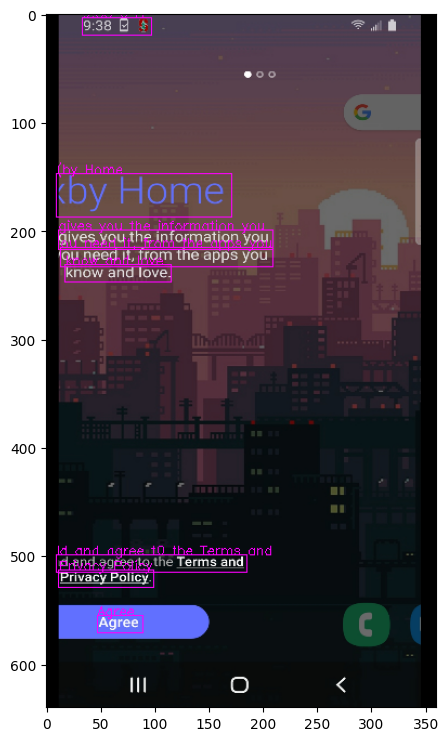

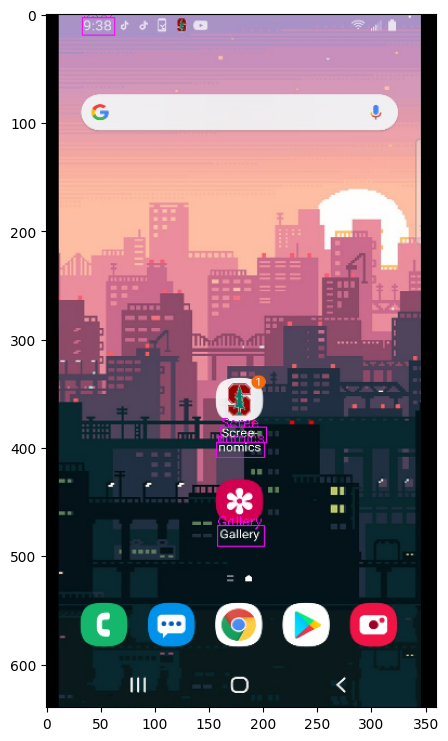

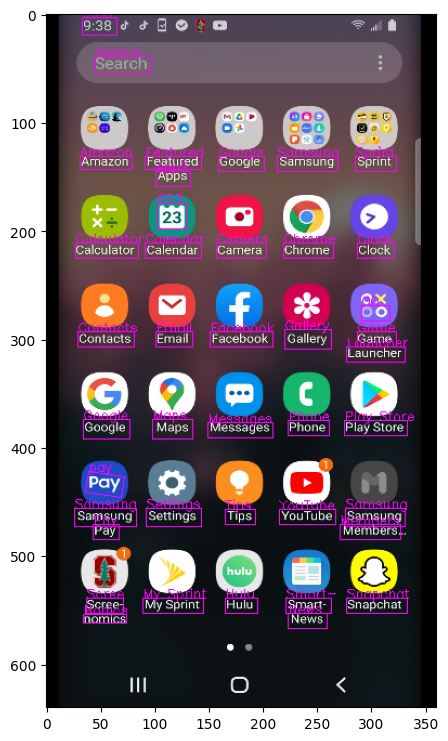

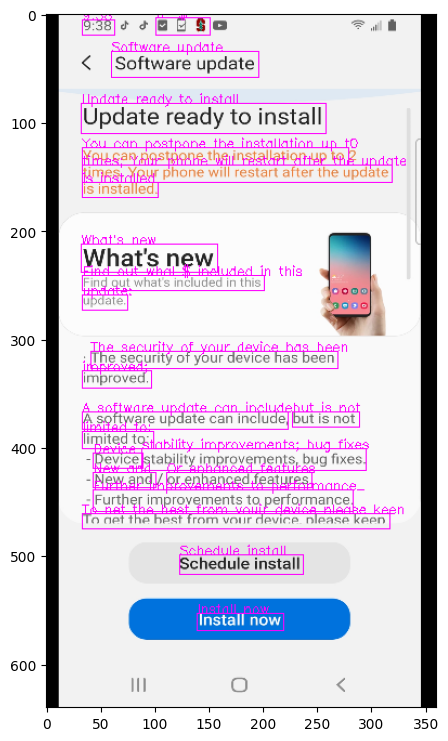

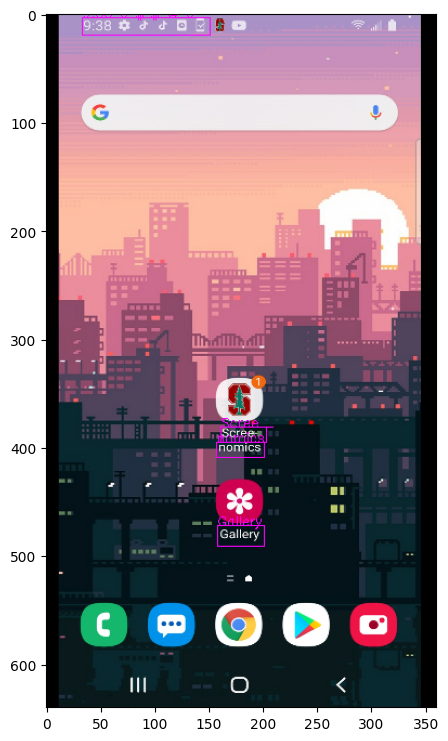

In [ ]:
## Show some results
import pickle
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

saved = os.listdir('w5_9999_out/OCR/results')
print("Batches outputed =", len(saved))
first_filename = [s for s in saved if s.startswith('0')][0]
print(first_filename)
with np.load(f'w5_9999_out/OCR/results/{first_filename}', allow_pickle=True) as a:
    img_names = a['img_names']
    result = a['result']


print(f"Length of batch = {len(img_names)}")

# helper
def ocr_show_result(img_path, bboxes, texts, resize = None, font_scale = None, thickness = None):
    """ show text detection results by image
    Args:
        img_file (str): image file name
        img (array): raw image context
        boxes (array): array of result file
            Shape: [num_detections, 4] for BB output / [num_detections, 4] for QUAD output
    Return:
        None
    """
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # img = imgproc.loadImage(img_path)
    # img = img[:,:,::-1]
    if resize:
        img = cv2.resize(img, resize) # cv2.resize takes new size as (width, height)
    img = np.array(img)

    for i, box in enumerate(bboxes):
        poly = np.array(box).astype(np.int32).reshape((-1))
        # poly = np.array(box).reshape((-1))
        strResult = ','.join([str(p) for p in poly]) + '\r\n'
        poly = poly.reshape(-1, 2)
        cv2.polylines(img, [poly.reshape((-1, 1, 2))], True, color=(255, 0, 255), thickness=1)
        # ptColor = (0, 255, 255)
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.8 if not font_scale else font_scale
        thickness = 1 if not thickness else thickness
        # cv2.putText(img, "{}".format(texts[i]), (poly[0][0]+1, poly[0][1]+1), font, font_scale, (0, 0, 0), thickness)
        # cv2.putText(img, "{}".format(texts[i]), tuple(poly[0]), font, font_scale, (255, 0, 255), thickness=2)
        cv2.putText(img, "{}".format(texts[i]), (poly[0][0], poly[0][1]), font, font_scale, (255, 0, 255), thickness)
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize = (16,9))
    plt.imshow(img)
    plt.show()

folder_name = 'class1' if os.path.exists(f'w5_9999/class1/{img_names[0]}') else 'class2'
img_paths = [f'w5_9999/{folder_name}/' + img for img in img_names[:5]]
bboxes = [[tup[0] for tup in tr] for tr in result[:5]]
texts = [[tup[1] for tup in tr] for tr in result[:5]]
for i, p in enumerate(img_paths):
    ocr_show_result(p, bboxes[i], texts[i], (360,640), 0.4, 1)

## 3.3 Object Detection

In [ ]:
%%bash
source activate assay
python Screenomics-Assay/scr_assay.py create ObjectDetection w5_9999 w5_9999_out
python Screenomics-Assay/scr_assay.py run ObjectDetection w5_9999 w5_9999_out



libjpeg-turbo is on


Initiating w5_9999 ObjectDetection dataset start at: 2023-06-15 21:17:45.461368

Initiation w5_9999 ObjectDetection dataset ends at: 2023-06-15 21:17:45.461758

Saving dataset...
Dataset saved, length = 50




libjpeg-turbo is on


Loading models...




Models loaded.


Loading dataset...
w5_9999_out/w5_9999_dataset_ObjectDetection.pkl
Dataset loaded, length = 50


Creating dataloader...
dataloader created, length = 2.


Processing starts at: 2023-06-15 21:18:00.462416

Done all 2 batches at: 2023-06-15 21:18:03.091573.
 Elapsed time: 0m 2.63s. 



Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
requirements: Ultralytics requirement "gitpython>=3.1.30" not found, attempting AutoUpdate...
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yolov5 7.0.12 requires boto3>=1.19.1, which is not installed.
yolov5 7.0.12 requires fire, which is not installed.
yolov5 7.0.12 requires huggingface-hub>=0.12.0, which is not installed.
yolov5 7.0.12 requires roboflow>=0.2.29, which is not installed.
yolov5 7.0.12 requires sahi>=0.11.10, which is not installed.
yolov5 7.0.12 requires thop>=0.1.1, which is not installed.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 197.6 MB/s

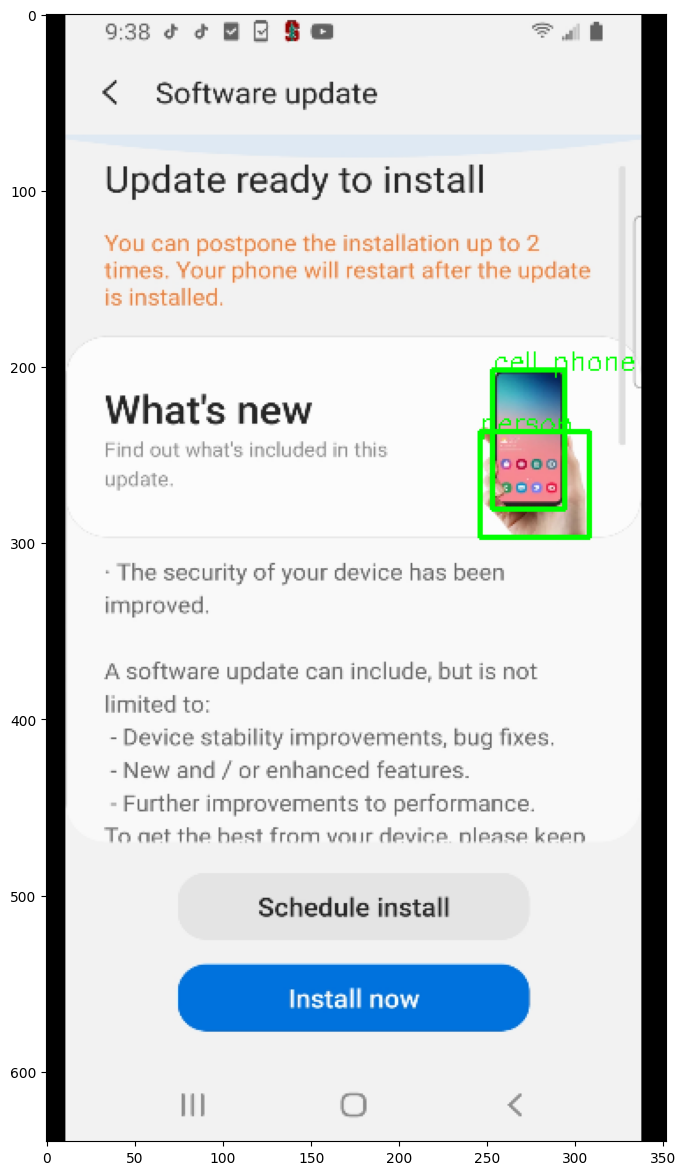

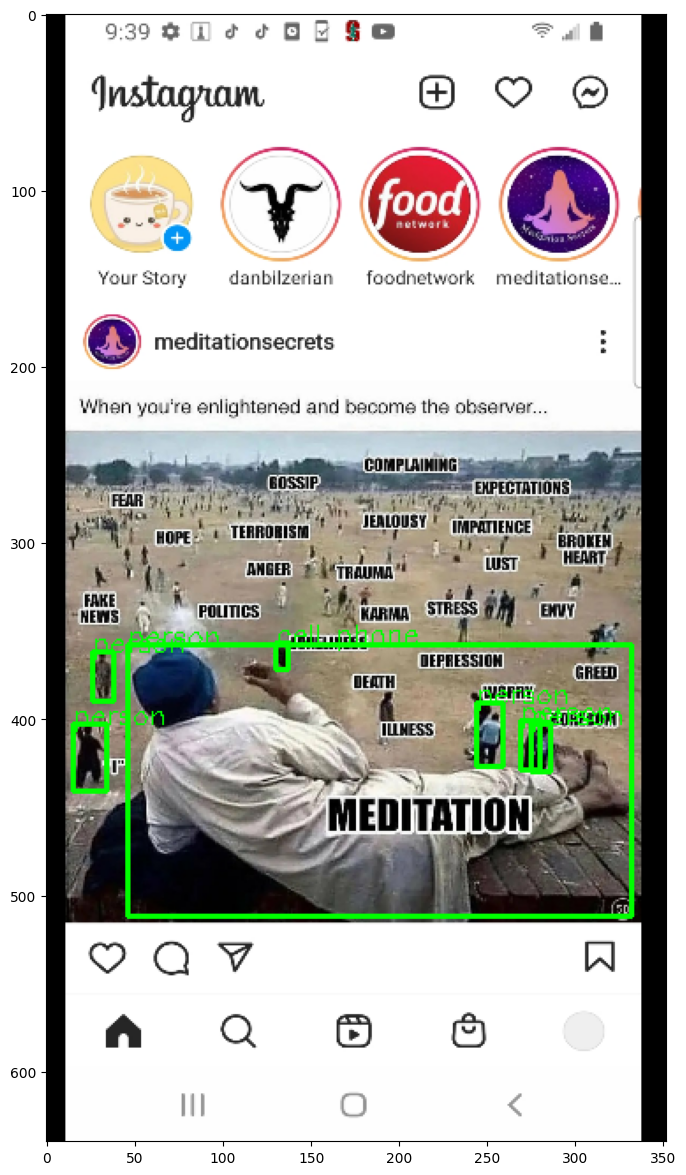

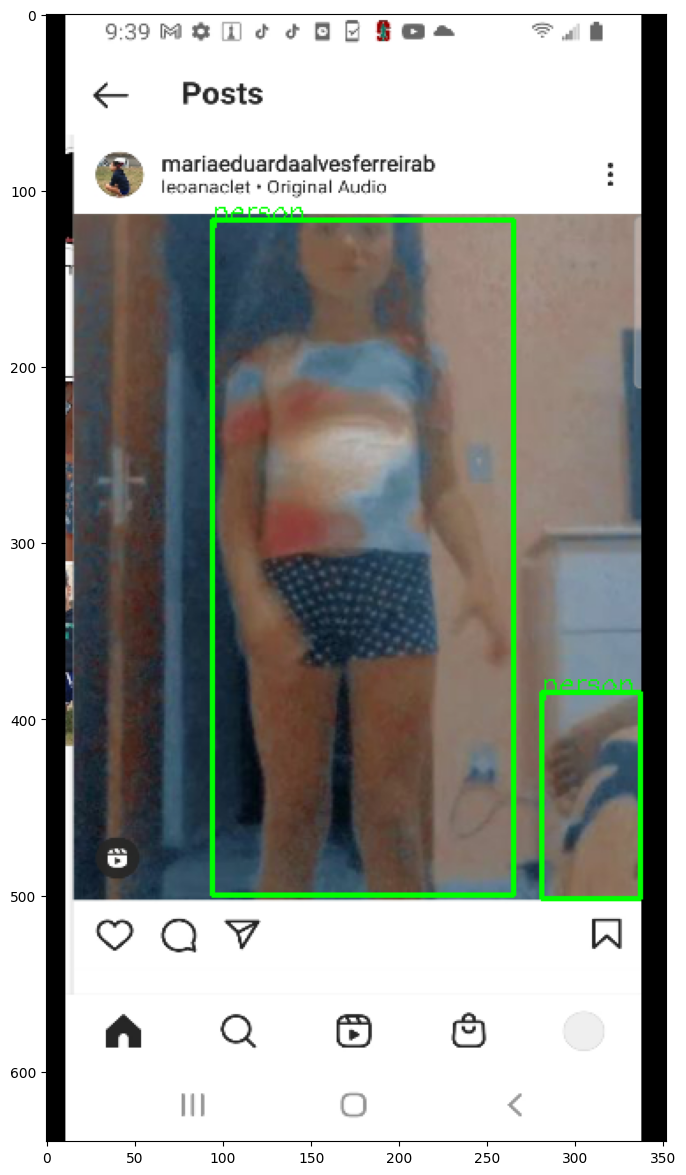

In [45]:
## Show some results
import cv2
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [8,16]

def PlotDetections(img_paths, results, label_map, ratio):
    for i in range(len(img_paths)):
        res = results[i]
        if len(res) == 0:
            continue
        img = cv2.imread(img_paths[i])
        # get the original image size
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (int(352*ratio), int(640*ratio)))
        for j in range(len(res)):
            x1, y1, x2, y2, conf, label = res[j]
            # convert x1, y1, x2, y2, label to int
            x1, y1, x2, y2, label = int(x1*ratio), int(y1*ratio), int(x2*ratio), int(y2*ratio), int(label)
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, label_map[label], (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
        plt.imshow(img)
        plt.show()

label_map = ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
        'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
        'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
        'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
        'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
        'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
        'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
        'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear',
        'hair drier', 'toothbrush']


saved = os.listdir('w5_9999_out/ObjectDetection/results')
first_filename = [s for s in saved if s.startswith('0')][0]

with np.load(f'w5_9999_out/ObjectDetection/results/{first_filename}', allow_pickle=True) as a:
    results = a['result']
    img_names = a['img_names']

folder_name = 'class1' if os.path.exists(f'w5_9999/class1/{img_names[0]}') else 'class2'
img_paths = [f'w5_9999/{folder_name}/' + img for img in img_names]

PlotDetections(img_paths[:10], results, label_map, 1)

## 3.4 Feature extraction


### 3.4.1 CLIP

In [ ]:
# Use clip for feature extraction (which is the default, so no need to specify the -m flag)
%%bash
source activate assay
python Screenomics-Assay/scr_assay.py create FeatureExtraction w5_9999 w5_9999_out
python Screenomics-Assay/scr_assay.py run FeatureExtraction w5_9999 w5_9999_out

libjpeg-turbo is on
Initiating w5_9999 FeatureExtraction dataset start at: 2023-06-15 21:18:28.850265

Initiation w5_9999 FeatureExtraction dataset ends at: 2023-06-15 21:18:28.850828

Saving dataset...
Dataset saved, length = 50


libjpeg-turbo is on
Loading models...


Getting model clip


Models loaded.


Loading dataset...
Dataset loaded, length = 50


Creating dataloader...
dataloader created, length = 2.




100%|███████████████████████████████████████| 933M/933M [00:09<00:00, 94.9MiB/s]
100%|██████████| 2/2 [00:03<00:00,  1.59s/it]


### 3.4.2 moco

In [ ]:
# Google Drive limits the times of anonymous download for a public file,
# so running this block in multiple times may cause the `run`
# command to raise an error saying that you "Cannot retrieve the public link of the file".
%%bash
source activate assay
# No need to create dataset because all FeatureExtraction models share the same dataset
python Screenomics-Assay/scr_assay.py run FeatureExtraction -m moco w5_9999 w5_9999_out

libjpeg-turbo is on
Loading models...


Getting model moco


Models loaded.


Loading dataset...
Dataset loaded, length = 50


Creating dataloader...
dataloader created, length = 2.




/usr/local/envs/assay/lib/python3.7/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Downloading...
From: https://drive.google.com/uc?id=1X22qWguXULPb7HFDknYMZnigfneWBPjS&confirm=t
To: /content/Screenomics-Assay/vit-b-300ep.pth.tar
100%|██████████| 863M/863M [00:12<00:00, 70.3MB/s]
100%|██████████| 2/2 [00:03<00:00,  1.59s/it]
